In [78]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [79]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

# установка параметров нейросети
batch_size = 512
num_classes = 10
epochs = 5
data_augmentation = False
num_predictions = 20

# разделение тренировочной и тестовой выборки
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'тренировочные примеры')
print(X_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


Проверка отображения данных:

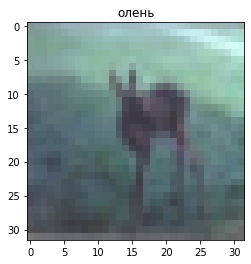

In [80]:
N = 555

plt.imshow(X_test[N])
plt.title(classes[np.argmax(y_test[N,:])])
plt.show()

Возьмем учебную сеть из учебного ноутбука и, в соответствии с заданием, уменьшим размер ядра свертки и количество блоков. Также уменьшим количество нейронов в слое Dense до 128 и размер пакета уведичим до 2000:

In [81]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(16, (1, 1), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (1, 1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()
# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 16)        64        
                                                                 
 activation_26 (Activation)  (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 16, 16, 16)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 32)        544       
                                                                 
 activation_27 (Activation)  (None, 16, 16, 32)        0         
                                                      

In [82]:
hh1 = model.fit(X_train, y_train,
              batch_size=2000,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)

Epoch 1/5
25/25 [==============================] - 24s 921ms/step - loss: 2.3290 - accuracy: 0.0979 - val_loss: 2.3010 - val_accuracy: 0.1129
Epoch 2/5
25/25 [==============================] - 20s 789ms/step - loss: 2.3147 - accuracy: 0.1051 - val_loss: 2.2969 - val_accuracy: 0.1293
Epoch 3/5
25/25 [==============================] - 21s 841ms/step - loss: 2.3084 - accuracy: 0.1070 - val_loss: 2.2937 - val_accuracy: 0.1426
Epoch 4/5
25/25 [==============================] - 20s 796ms/step - loss: 2.3016 - accuracy: 0.1124 - val_loss: 2.2909 - val_accuracy: 0.1584
Epoch 5/5
25/25 [==============================] - 21s 812ms/step - loss: 2.2972 - accuracy: 0.1187 - val_loss: 2.2879 - val_accuracy: 0.1704


Проверим результаты метрик:

In [83]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 2.2879 - accuracy: 0.1704
Test loss: 2.2879326343536377
Test accuracy: 0.1703999936580658


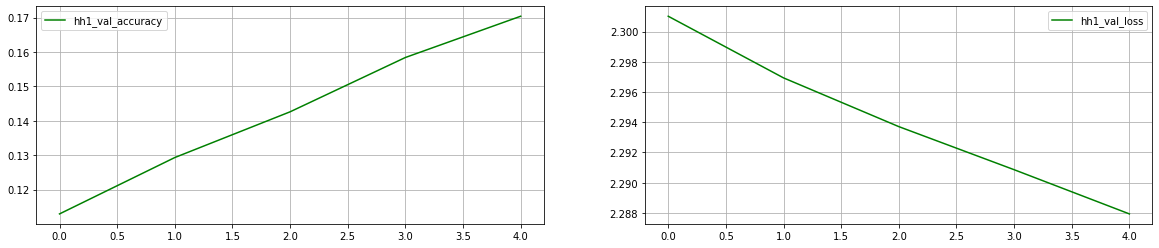

In [115]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(4)
fig.set_figwidth(20)
ax1.plot(hh1.history['val_accuracy'],'g', label = 'hh1_val_accuracy')
ax1.legend()
ax1.grid('On')
ax2.plot(hh1.history['val_loss'],'g', label = 'hh1_val_loss')
ax2.legend()
ax2.grid('On')

Проверка предсказания:

1/1 [==============================] - 0s 77ms/step


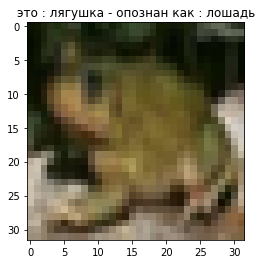

In [85]:
N = 333
y_p = model.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

Теперь попробуем увеличить количество слоев в два раза:

In [97]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(64, (1, 1), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1, 1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (1, 1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (1, 1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()
# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 32, 32, 64)        256       
                                                                 
 activation_58 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_44 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_35 (Conv2D)          (None, 16, 16, 128)       8320      
                                                                 
 activation_59 (Activation)  (None, 16, 16, 128)       0         
                                                     

Как видно из конфигурации, количество параметров существенно возрослоо.

In [98]:
hh2 = model.fit(X_train, y_train,
              batch_size=2000,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)

Epoch 1/5
25/25 [==============================] - 131s 5s/step - loss: 2.3218 - accuracy: 0.0988 - val_loss: 2.3018 - val_accuracy: 0.1004
Epoch 2/5
25/25 [==============================] - 124s 5s/step - loss: 2.3118 - accuracy: 0.0999 - val_loss: 2.3015 - val_accuracy: 0.0999
Epoch 3/5
25/25 [==============================] - 124s 5s/step - loss: 2.3094 - accuracy: 0.1024 - val_loss: 2.3013 - val_accuracy: 0.1037
Epoch 4/5
25/25 [==============================] - 124s 5s/step - loss: 2.3058 - accuracy: 0.1062 - val_loss: 2.3012 - val_accuracy: 0.1078
Epoch 5/5
25/25 [==============================] - 125s 5s/step - loss: 2.3039 - accuracy: 0.1051 - val_loss: 2.3011 - val_accuracy: 0.1112


In [99]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 6s 18ms/step - loss: 2.3011 - accuracy: 0.1112
Test loss: 2.3010716438293457
Test accuracy: 0.1111999973654747


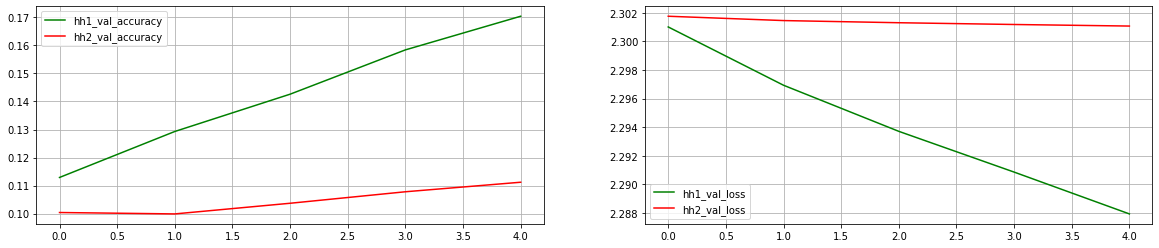

In [114]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(4)
fig.set_figwidth(20)
ax1.plot(hh1.history['val_accuracy'],'g', label = 'hh1_val_accuracy')
ax1.plot(hh2.history['val_accuracy'],'r', label = 'hh2_val_accuracy')
ax1.legend()
ax1.grid('On')
ax2.plot(hh1.history['val_loss'],'g', label = 'hh1_val_loss')
ax2.plot(hh2.history['val_loss'],'r', label = 'hh2_val_loss')
ax2.legend()
ax2.grid('On')

Как видно из метрик и графиков, увеличение количества слоев в два раза показало результат хуже предыдущего.

Теперь увеличим количество фильтров при прежнем количестве слоев (2 слоя):

In [106]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (1, 1), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (1, 1)))
model.add(Activation('relu'))
model.add(Conv2D(32, (1, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (1, 1), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (1, 1)))
model.add(Activation('relu'))
model.add(Conv2D(64, (1, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()
# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 32, 32, 32)        128       
                                                                 
 activation_78 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_49 (Conv2D)          (None, 32, 32, 32)        1056      
                                                                 
 activation_79 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_50 (Conv2D)          (None, 32, 32, 32)        1056      
                                                                 
 activation_80 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 16, 16, 32)     

При добавлении двух дополнительных фильтров в каждый слой количество параметров увеличилось примерно в два раза.

In [107]:
hh3 = model.fit(X_train, y_train,
              batch_size=2000,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)

Epoch 1/5
25/25 [==============================] - 98s 4s/step - loss: 2.3045 - accuracy: 0.1012 - val_loss: 2.3022 - val_accuracy: 0.1122
Epoch 2/5
25/25 [==============================] - 96s 4s/step - loss: 2.3029 - accuracy: 0.1045 - val_loss: 2.3015 - val_accuracy: 0.0993
Epoch 3/5
25/25 [==============================] - 95s 4s/step - loss: 2.3018 - accuracy: 0.1068 - val_loss: 2.3007 - val_accuracy: 0.1153
Epoch 4/5
25/25 [==============================] - 96s 4s/step - loss: 2.3011 - accuracy: 0.1074 - val_loss: 2.3001 - val_accuracy: 0.1361
Epoch 5/5
25/25 [==============================] - 95s 4s/step - loss: 2.3004 - accuracy: 0.1086 - val_loss: 2.2994 - val_accuracy: 0.1444


In [108]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 5s 14ms/step - loss: 2.2994 - accuracy: 0.1444
Test loss: 2.2994344234466553
Test accuracy: 0.1444000005722046


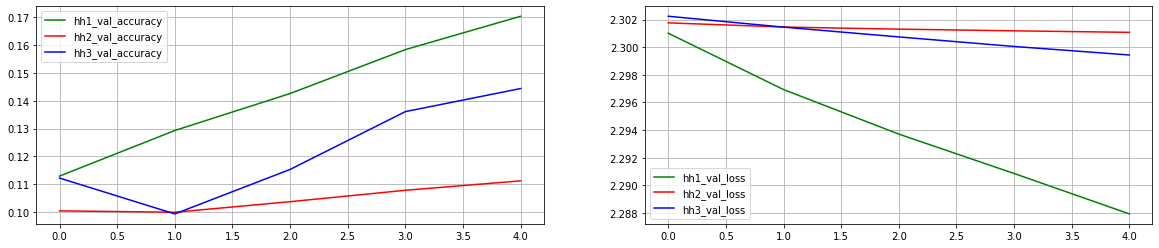

In [112]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(4)
fig.set_figwidth(20)
ax1.plot(hh1.history['val_accuracy'],'g', label = 'hh1_val_accuracy')
ax1.plot(hh2.history['val_accuracy'],'r', label = 'hh2_val_accuracy')
ax1.plot(hh3.history['val_accuracy'],'b', label = 'hh3_val_accuracy')

ax1.legend()
ax1.grid('On')
ax2.plot(hh1.history['val_loss'],'g', label = 'hh1_val_loss')
ax2.plot(hh2.history['val_loss'],'r', label = 'hh2_val_loss')
ax2.plot(hh3.history['val_loss'],'b', label = 'hh3_val_loss')

ax2.legend()
ax2.grid('On')

Увеличение количества фильтров привело к промежуточному результату между первым и вторым экспериментом.

Итоговоая таблица:

In [123]:
print(f"Учебная сеть с упрощениями - val_accuracy: {hh1.history['val_accuracy'][-1]}, val_loss: {hh1.history['val_loss'][-1]}")
print(f"Дополнительные слои -        val_accuracy: {hh2.history['val_accuracy'][-1]}, val_loss: {hh2.history['val_loss'][-1]}")
print(f"Дополнительные фильтры -     val_accuracy: {hh3.history['val_accuracy'][-1]}, val_loss: {hh3.history['val_loss'][-1]}")

Учебная сеть с упрощениями - val_accuracy: 0.1703999936580658, val_loss: 2.2879323959350586
Дополнительные слои -        val_accuracy: 0.1111999973654747, val_loss: 2.3010730743408203
Дополнительные фильтры -     val_accuracy: 0.1444000005722046, val_loss: 2.2994346618652344


Вывод: как можно видеть из результатов, ни увеличение количества слоев, ни увеличение количества фильтров, по отдельности не смогли улучшить результат изначальной модели.